In [127]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [128]:
df_longe = pd.read_csv('nossa_longe.csv')
df_med = pd.read_csv('nossa_med.csv')
df_perto = pd.read_csv('nossa_perto.csv')

# Leituras do Giuliano
df_1 = pd.read_csv('leitura_1.csv')
df_2 = pd.read_csv('leitura_2.csv')

In [129]:
def create_hash(df):
    exp_read_list = {}
    for read, exp in zip(df['read'], df['expected']):
        if exp in exp_read_list.keys():
            exp_read_list[exp].append(read)
        else:
            exp_read_list[exp] = []
            exp_read_list[exp].append(read)
    return exp_read_list

In [130]:
hash_longe = create_hash(df_longe)
hash_med = create_hash(df_med)
hash_perto = create_hash(df_perto)

In [131]:
def calc_abs_errors(hash_df):
    errs = []
    for key in hash_df.keys():
        for read in hash_df[key]:
            errs.append(np.abs(key-read))
            
    return errs

In [132]:
errs_longe = calc_abs_errors(hash_longe)
errs_med = calc_abs_errors(hash_med)
errs_perto = calc_abs_errors(hash_perto)

In [156]:
def plot_normal(e, c):
    mu = np.mean(e)
    sigma = np.std(e)
    print("Media {}".format(mu))
    print("Desvio Padrao {}".format(sigma))
    bins = np.arange(-200, 200)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color=c)


Media 44.32939803402727
Desvio Padrao 56.218188671970424


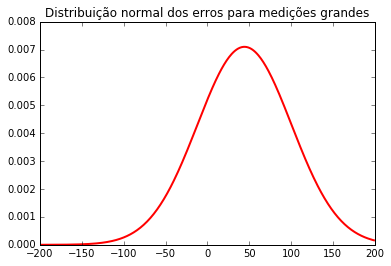

In [167]:
plt.title('Distribuição normal dos erros para medições grandes')
plot_normal(errs_longe, 'r')

Media 3.951275165264423
Desvio Padrao 1.2671355827389552


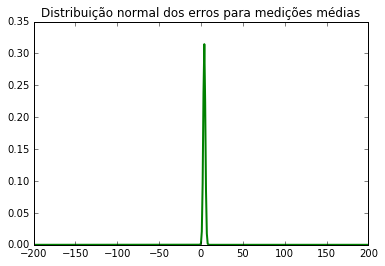

In [168]:
plt.title('Distribuição normal dos erros para medições médias')
plot_normal(errs_med, 'g')

Media 14.226672968153137
Desvio Padrao 25.13857374346723


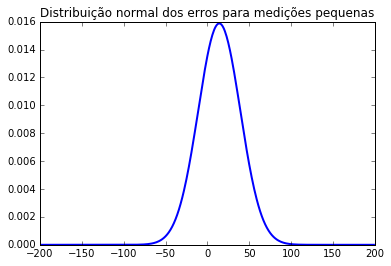

In [169]:
plt.title('Distribuição normal dos erros para medições pequenas')
plot_normal(errs_perto, 'b')

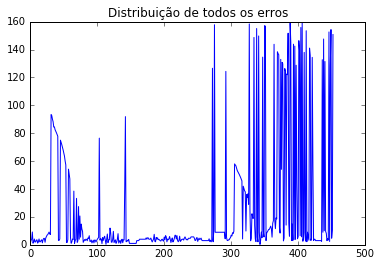

In [170]:
total_errs = errs_perto + errs_med + errs_longe

plt.plot(total_errs)
plt.title("Distribuição de todos os erros")

In [181]:
frames = [df_longe, df_med, df_perto]
all_df = pd.concat(frames)
hash_all = create_hash(all_df)
print(hash_all)

{28.583850860595703: [25.0, 24.0, 24.0], 100.01523590087891: [91.0], 34.754093170166016: [27.0], 25.034309387207031: [22.0, 23.0, 22.0, 24.0, 22.0, 21.0], 28.314250946044922: [25.0, 24.0], 100.72811889648438: [255.0], 29.80908203125: [23.0, 23.0, 28.0, 25.0, 24.0], 26.00748443603516: [23.0, 22.0], 29.165838241577148: [25.0], 29.809078216552731: [24.0], 24.9506950378418: [22.0], 25.187746047973636: [23.0, 23.0, 22.0, 24.0, 23.0, 21.0], 26.142293930053711: [23.0, 24.0, 22.0, 24.0, 24.0, 23.0], 27.58444786071777: [24.0, 25.0, 22.0, 24.0, 29.0], 28.583852767944336: [24.0, 22.0], 29.165834426879886: [24.0, 23.0, 25.0, 30.0, 24.0], 30.90169715881348: [24.0], 31.303396224975586: [25.0], 32.635181427001946: [24.0, 24.0], 33.125324249267578: [25.0, 24.0], 34.183185577392578: [24.0, 25.0], 35.988910675048828: [94.0, 28.0], 36.656974792480469: [94.0], 37.361907958984375: [94.0], 38.106327056884773: [93.0, 130.0], 39.725395202636719: [93.0, 128.0], 40.606731414794922: [93.0, 125.0], 41.54100799560

In [68]:
def hash_to_arrays(hash_df):
    x = []
    y = []
    for exp in hash_df.keys():
        for read in hash_df[exp]:
            x.append(exp)
            y.append(read)
    x = np.array(x)
    y = np.array(y)
    return x, y

In [69]:
x_longe, y_longe = hash_to_arrays(hash_longe)
x_perto, y_perto = hash_to_arrays(hash_perto)
x_med, y_med = hash_to_arrays(hash_med)


42.6519337017
39.9550211079


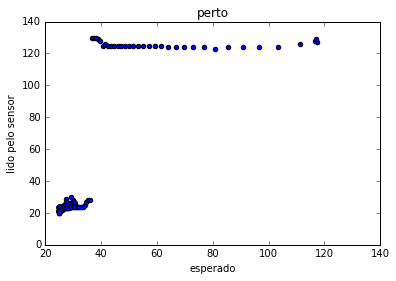

In [81]:
mi_perto = np.mean(y_perto)
sig_perto = np.std(y_perto)

print(np.mean(y_perto))
print(np.std(y_perto))
plt.scatter(x_perto,y_perto)
plt.title('perto')
plt.ylabel('lido pelo sensor')
plt.xlabel('esperado')

22.2637362637
1.46636400766


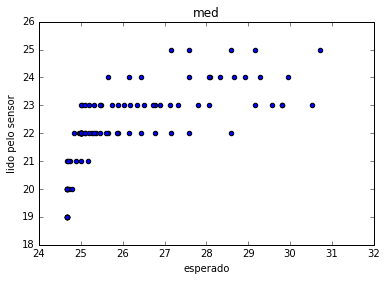

In [83]:
mi_med = np.mean(y_med)
sig_med = np.std(y_med)

print(np.mean(y_med))
print(np.std(y_med))
plt.scatter(x_med,y_med)
plt.title('med')
plt.ylabel('lido pelo sensor')
plt.xlabel('esperado') 

110.270718232
86.1372326247


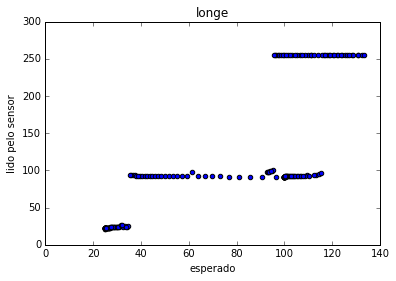

In [85]:
mi_longe = np.mean(y_longe)
sig_longe = np.std(y_longe)

print(np.mean(y_longe))
print(np.std(y_longe))
plt.scatter(x_longe,y_longe)
plt.title('longe')
plt.ylabel('lido pelo sensor')
plt.xlabel('esperado') 

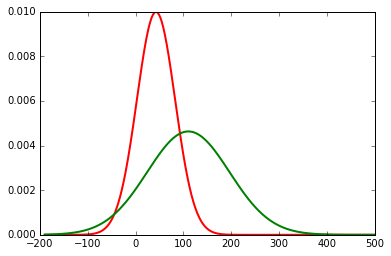

In [101]:
normal_perto = np.random.normal(mi_perto, sig_perto, 1000)
normal_longe = np.random.normal(mi_longe, sig_longe, 1000)
normal_med = np.random.normal(mi_med, sig_med, 1000)

#count, bins, ignored = plt.hist(normal_longe, 100, normed=True)
#print(bins)

bins = np.arange(-190, 500)

mu = mi_perto
sigma = sig_perto
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

#mu = mi_med
#sigma = sig_med
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='b')


mu = mi_longe
sigma = sig_longe
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='g')

plt.show()

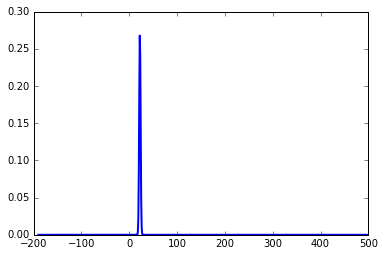

In [102]:
mu = mi_med
sigma = sig_med
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='b')



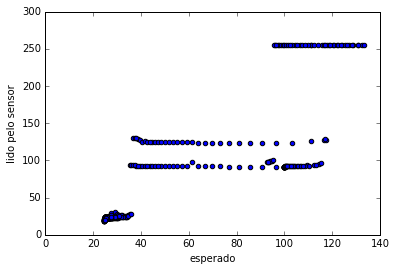

In [60]:
plt.scatter(x,y)
plt.ylabel('lido pelo sensor')
plt.xlabel('esperado')

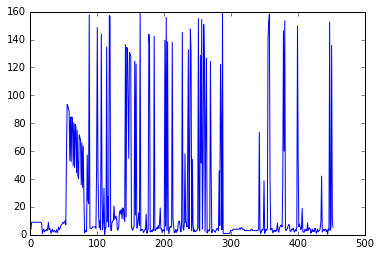

In [56]:
plt.plot(np.abs(x-y))